# Track inner droplet with predictive cropping and HoughCircles

In this notebook, I implement the droplet tracking software using the following idea 
- crop the raw images so that inner droplet makes the majority of the cropped image
- use HoughCircles method to locate the droplet in the cropped image


The cropping in the next frame is determined based on the position detected on the previous frame. If droplet can be detected on every frame, this method should work perfectly. If there are some frames where droplet is missing (i.e. the return value of HoughCircles is None), we use the previous frame info to determine the crop. 

In [16]:
import numpy as np
from skimage import io
import os
import matplotlib.pyplot as plt
import cv2
import matplotlib.patches as mpatch

In [3]:
stack = io.imread('video-sample.tif')

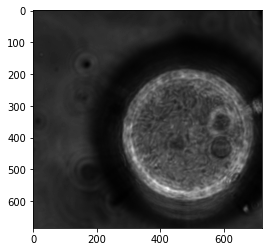

In [7]:
plt.imshow(stack[0], cmap='gray')

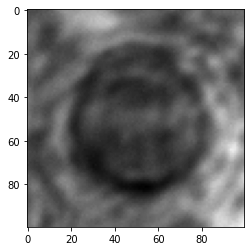

In [11]:
# we describe the crop by (upper, lower, left, right) tuple
crop = (380, 480, 540, 640)
cropped = stack[0][crop[0]:crop[1], crop[2]:crop[3]]
plt.imshow(cropped, cmap='gray')

In [18]:
# For this video, cropped image size (100, 100) is sufficient
circles = cv2.HoughCircles(cropped, cv2.HOUGH_GRADIENT, 1, 200, param2=1, maxRadius=40, minRadius=25)
circles

array([[[54.5, 49.5, 36. ]]], dtype=float32)

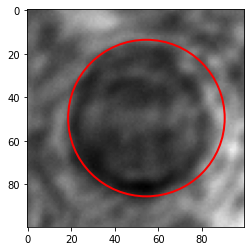

In [19]:
fig, ax = plt.subplots()
ax.imshow(cropped, cmap='gray')
for c in circles[0, :, :]:
    circle_object = mpatch.Circle((c[0], c[1]), c[2],
                                 fill=False, ec='red', lw=2)
    ax.add_patch(circle_object)

In [26]:
# determine the crop of the next image
x0, y0 = 430, 590
crop_size = 50
if circles is not None:
    x, y = int(circles[0, 0, 0]+x0-crop_size), int(circles[0, 0, 1]+y0-crop_size)
    crop = [x - crop_size, x + crop_size, y - crop_size, y + crop_size]

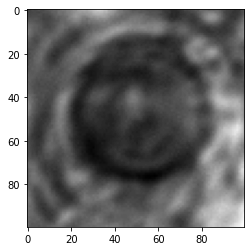

In [27]:
cropped = stack[1][crop[0]:crop[1], crop[2]:crop[3]]
plt.imshow(cropped, cmap='gray')

In [28]:
# detect circle in frame 2 (stack[1])
circles = cv2.HoughCircles(cropped, cv2.HOUGH_GRADIENT, 1, 200, param2=1, maxRadius=40, minRadius=25)
circles

array([[[53.5, 45.5, 33.8]]], dtype=float32)

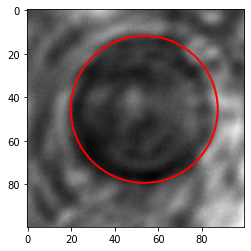

In [29]:
fig, ax = plt.subplots()
ax.imshow(cropped, cmap='gray')
for c in circles[0, :, :]:
    circle_object = mpatch.Circle((c[0], c[1]), c[2],
                                 fill=False, ec='red', lw=2)
    ax.add_patch(circle_object)

In [ ]:
# This loop can keep going 
# It breaks down when droplet cannot be detected for a long period
# in that case, either try take better video, or segment the video into pieces where droplet can be always detected